In [2]:
from typing import Literal
def _decide_target(left: list[list[float] | None], right: list[list[float] | None]) -> tuple[list[float], Literal["left", "right"] | None] :
            """
            Decides which hand to continue our preprocessing step for.
            
            That is, choosing the longest list when all 'None's are removed.
            """
            left_landmarks = sum([elm for elm in left if elm is not None],[])
            right_landmarks = sum([elm for elm in right if elm is not None],[])
            target = max((left_landmarks, "left"), 
                        (right_landmarks,"right"), 
                        key=lambda x : len(x[0]))
            if not target[0]: #both were full of "None" somehow??
                return [],None
            return target

In [12]:
import dynamic_signs.csv_reader as csv_reader
import numpy as np

from sign.trajectory import TrajectoryBuilder
import time

reader = csv_reader.csv_reader()
#PATH = "../backend/small_dyn.csv"
PATH = "../backend/new_youtube.csv"
start = time.time()
print("Loading data")
data = reader.extract_two_handed_landmarks(PATH)
end = time.time()
print(f"Loading took {end-start} seconds")

bob = TrajectoryBuilder(target_len=6)
xs = []
ys:list[str]= []
DIM = (-1,21,3)

print("")
for label, videos in data.items():
    for video_id, frames in videos.items():
        left_frames, right_frames = zip(*[frame.get_landmarks() for frame in frames])
        target, hand = _decide_target(left_frames, right_frames) 
        target = np.array(bob.enforce_target_length(list(np.array(target).reshape(DIM)))).flatten()
        xs.append(target)
        ys.append(label + "_" + str(hand))
        #print(f"{label} : {video_id} -> {hand}")

X = np.array(xs, dtype=np.float32)
Y = np.array(ys)
X.shape, len(Y)
        

Loading data
Loading took 28.151751041412354 seconds
🔥🔥 TrajectoryBuilder is now running in BERTRAM_MODE 🔥🔥



((9549, 378), 9549)

378


Text(0, 0, 'hello_right')

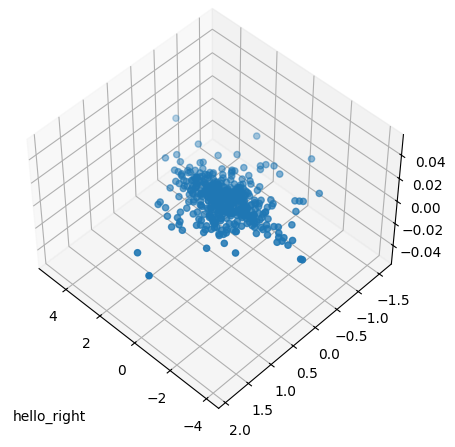

In [52]:
import matplotlib.pyplot as plt
from sklearn import decomposition
import mpl_toolkits.mplot3d 

fig = plt.figure(1, figsize=(4,3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0,0,1,2])#type: ignore


plt.cla()
pca = decomposition.PCA()
pca.fit(X,Y)
Xt = pca.transform(X)

print(len(Xt[0]))
#for name in Y:

name = np.unique(Y)[69]
ax.scatter(Xt[Y == name,1], Xt[Y == name,8])
ax.text(
    0,0,0,
    s=name,
    ha='left',
    va='top',
    transform=ax.transAxes
)

#list(zip(np.unique(Y),range(len(np.unique(Y)))))
# for label, name in enumerate(np.unique(Y)):
    
#     ax.text3D(
#         X[Y == name, 0].mean(),
#         X[Y == name, 1].mean() + 1.5,
#         X[Y == name, 2].mean(),
#         name,
#         horizontalalignment="center",
#         bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
#     )
# # Reorder the labels to have colors matching the cluster results
# y = np.choose(Y, [1, 2, 0]).astype(float)
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

# ax.xaxis.set_ticklabels([])
# ax.yaxis.set_ticklabels([])
# ax.zaxis.set_ticklabels([])

# plt.show()  
